### Exit Tickets

* Can I get Jupyter to run all the code in a notebook at 1 time?
* Why are do some data structures have inplace methods but not others?
* Can we practice a double loop question

In [1]:
highest=0
# largest product
for i in range(100,1000):
    for z in range(100,1000):
        product = i*z
        if product> highest:
            highest = product
highest

998001

In [2]:
highest/999

999.0

In [2]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Class objects in python, a primer

In [4]:
# A variable stored in an instance or class is called an attribute.
# A function stored in an instance or class is called a method.

class Dog:

    # Initializer / Instance Attributes
    def __init__(self, name, age):
        self.name = name
        self.age = age

    # instance method
    def description(self):
        return "{} is {} years old".format(self.name, self.age)

    # instance method
    def speak(self, sound):
        return "{} says {}".format(self.name, sound)

# Instantiate the Dog object
mikey = Dog("Mikey", 6)

In [5]:
# call our methods and attributes
print(mikey.name)
print(mikey.description())
print(mikey.speak("Gruff Gruff"))

Mikey
Mikey is 6 years old
Mikey says Gruff Gruff


** Python libraries in general are collections of functions and methods that allow us to perform lots of actions without writing as much of our own code **

# what is pandas 

* The pandas library is written specifically for, and one of the most widely used tools for, data manipulation and analysis in Python. Put another way, the functions Pandas supports are integral to understanding, formatting, and preparing our data. 
* Pandas takes data (a python object like a dictionary, a local file like a CSV, a remote file or database, ) and creates a Python object with rows and columns called a dataframe
* It is built on another library, Numpy, and uses other public libraries (like Matplotlib for plotting)
* Pandas has a unique syntax

### Pandas is the library we'll use to perform Exploratory Data Analysis.

In [5]:
ames = pd.read_csv('./data/housing.csv',usecols=['PoolQC','MSZoning','GrLivArea','OverallQual','SalePrice'])

In [18]:
# a pandas table of multiple columns is a dataframe
print(type(ames))
ames.head(2)

<class 'pandas.core.frame.DataFrame'>


,MSZoning,OverallQual,GrLivArea,PoolQC,SalePrice
0,RL,7,1710,NaN,208500
1,RL,6,1262,NaN,181500


In [19]:
# a single pandas column is a series, a different data type
print(type(ames.SalePrice))
ames.SalePrice.head(1)

<class 'pandas.core.series.Series'>


0    208500
Name: SalePrice, dtype: int64

In [21]:
# count of zoning values
ames.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [25]:
# most homes do not have pool quality scores
print(str(ames.shape[0])+ ' rows in dataset')
print(str(ames.PoolQC.isnull().sum())+ ' properties with null PoolQC values')

1460 rows in dataset
1453 properties with null PoolQC values


### If our goal is to accurately predict prices for houses (so that we can sell them for as large a profit as possible) mock up your idea of a process for exploring the data

#### also, identify what phase(s) of the data science life cycle we could be in

#### refer to data dictionary - data_description.txt - in data folder 

,MSZoning,OverallQual,GrLivArea,PoolQC,SalePrice
0,RL,7,1710,NaN,208500
1,RL,6,1262,NaN,181500
2,RL,7,1786,NaN,223500
3,RL,7,1717,NaN,140000
4,RL,8,2198,NaN,250000


# are there any observations we need to exclude 

### non-residential properties

In [6]:
print(ames.shape)
ames = ames[ames.MSZoning!='C (all)']
ames.shape

(1460, 5)


(1450, 5)

# zero in on the target variable: SalePrice

### histograms for visualizing a continuous distribution

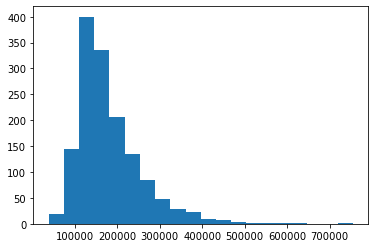

In [7]:
ames.SalePrice.hist(grid=False,bins=20);

In [8]:
ames.SalePrice.describe()

count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# use your intuition to investigate variables that seem like they should have a relationship to the target variable

### boxplots for visualizing relationships between numeric and categorical variables

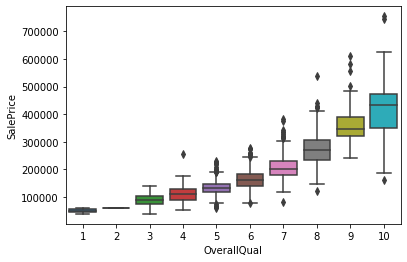

In [26]:
sns.boxplot(x=ames.OverallQual, y=ames.SalePrice);

In [10]:
ames.groupby('OverallQual')['SalePrice'].mean()

OverallQual
1      50150.000000
2      60000.000000
3      87970.833333
4     110114.594595
5     133719.131313
6     161677.305630
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

### scatter plots for visualizing relationships between numeric variables

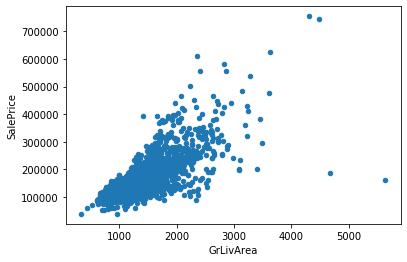

In [23]:
ames.plot(y='SalePrice',x='GrLivArea',kind='scatter');

### investigate outliers

In [24]:
mask = (ames.GrLivArea>4000)&(ames.SalePrice<250000)
ames[mask]

,MSZoning,OverallQual,GrLivArea,SalePrice
523,RL,10,4676,184750
1298,RL,10,5642,160000


###  heat maps can be another tool to identify relevant features, but correlations can be spurious

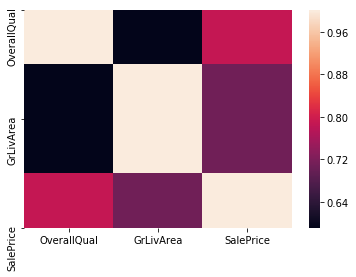

In [20]:
sns.heatmap(ames[['OverallQual','GrLivArea','SalePrice']].corr());

# missing data - what other features might help us predict home sale prices?